# Loading the data

In [1]:
import pandas as pd
data = pd.read_csv('airbnb_Chicago.csv')

In [2]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120217 entries, 0 to 120216
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Airbnb Host ID                 120217 non-null  int64  
 1   Airbnb Property ID             120217 non-null  int64  
 2   City_x                         120217 non-null  object 
 3   superhost_period_all           120217 non-null  int64  
 4   Superhost                      120217 non-null  int64  
 5   rating_ave_pastYear            100372 non-null  float64
 6   numReviews_pastYear            101419 non-null  float64
 7   numCancel_pastYear             101419 non-null  float64
 8   prop_5_StarReviews_pastYear    100372 non-null  float64
 9   numReservedDays_pastYear       116703 non-null  float64
 10  numReserv_pastYear             116703 non-null  float64
 11  hostResponseAverage_pastYear   112851 non-null  float64
 12  available_days                

/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_23247/2287916041.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


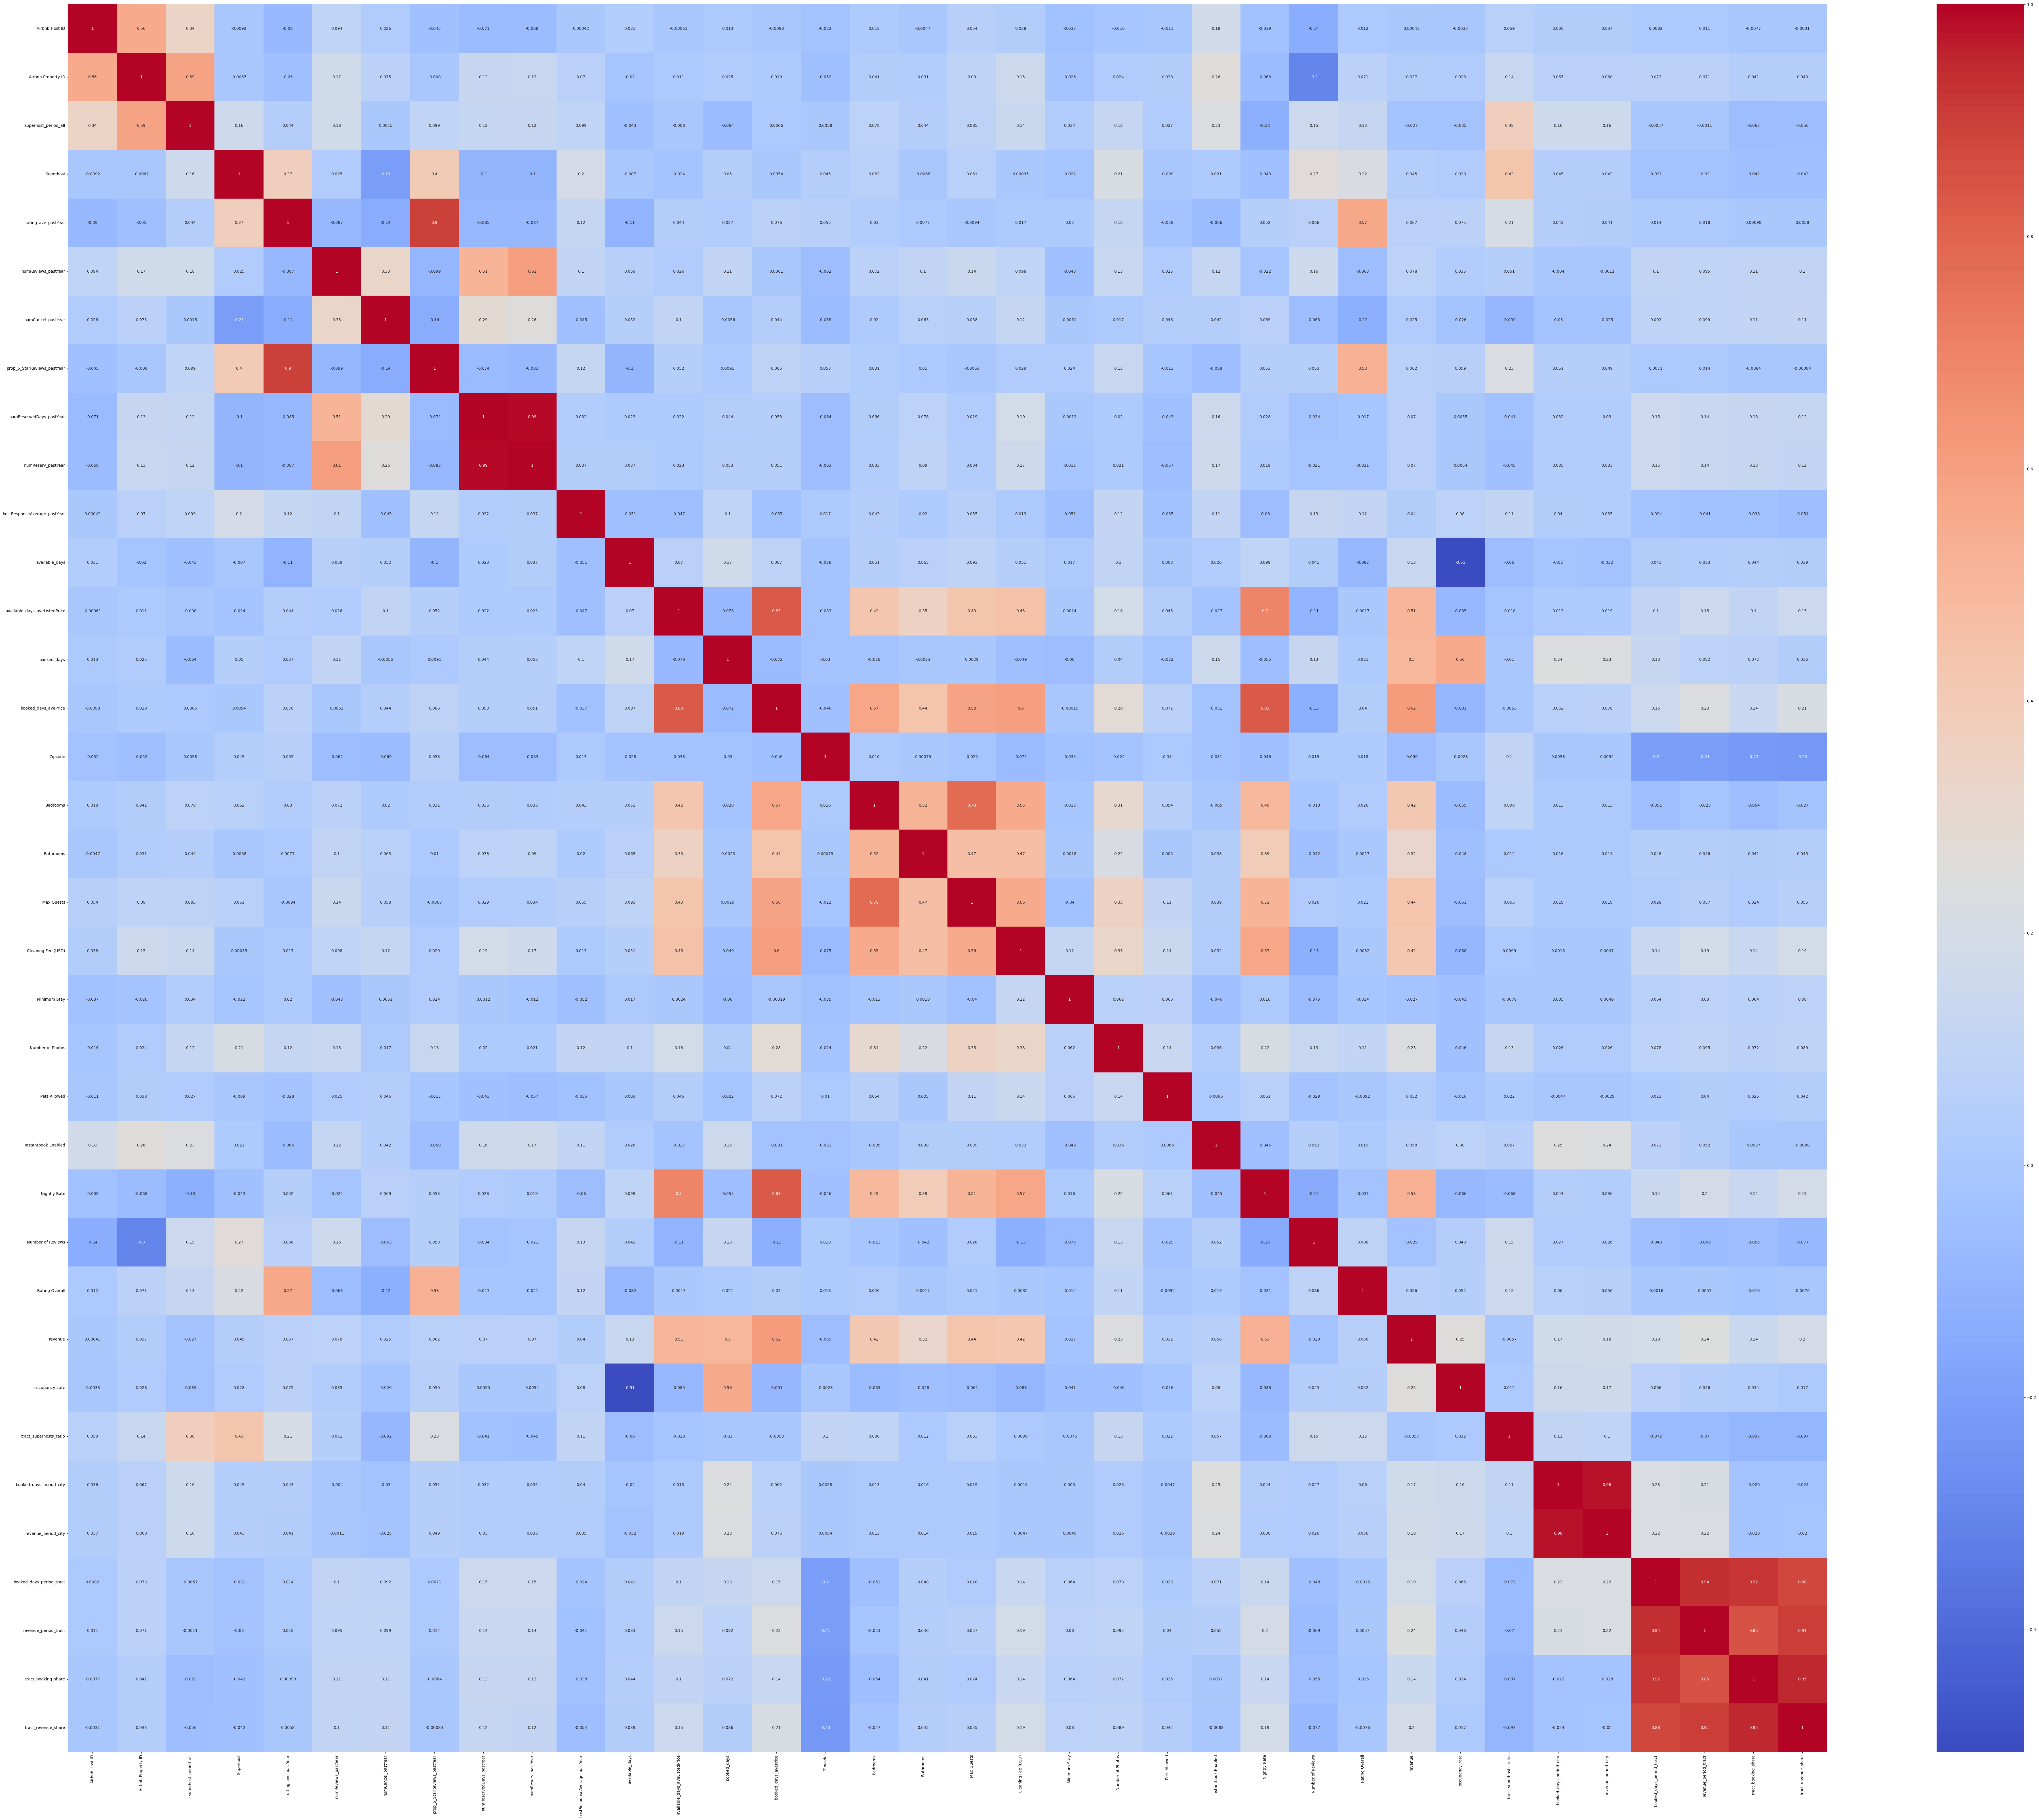

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(100, 80))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [4]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Find pairs of features with correlation >= 0.9
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= 0.9:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

high_corr_pairs

/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_23247/1342108033.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


[('numReservedDays_pastYear', 'numReserv_pastYear', 0.9910773764081522),
 ('booked_days_period_city', 'revenue_period_city', 0.9794522473607217),
 ('booked_days_period_tract', 'revenue_period_tract', 0.9406179110929753),
 ('booked_days_period_tract', 'tract_booking_share', 0.9222371471509241),
 ('revenue_period_tract', 'tract_revenue_share', 0.9053670204045761),
 ('tract_booking_share', 'tract_revenue_share', 0.9512180145605096)]

In [5]:
# Dropping the columns with greater than or equal to 0.9 correlation from the DataFrame
data.drop(columns=['numReservedDays_pastYear',
                   'revenue_period_city',
                   'revenue_period_tract',
                   'booked_days_period_tract',
                   'revenue_period_tract',
                   'tract_revenue_share'
                  ], inplace=True)

# Outlier Detection

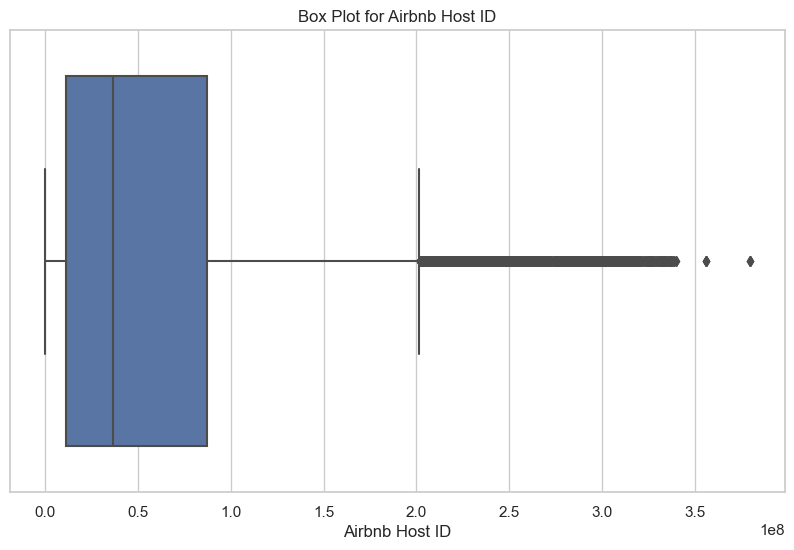

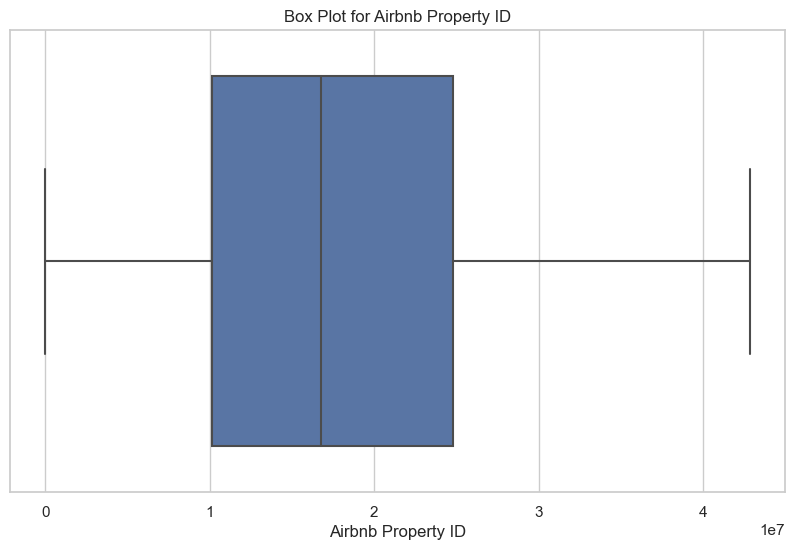

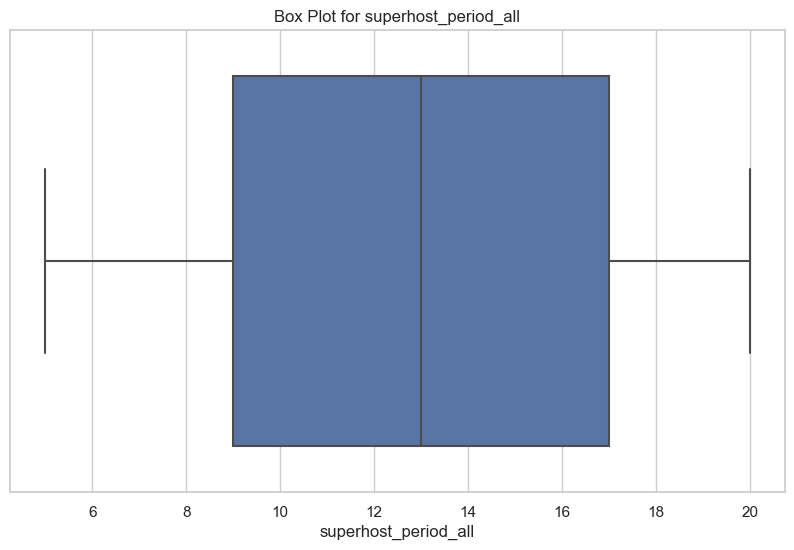

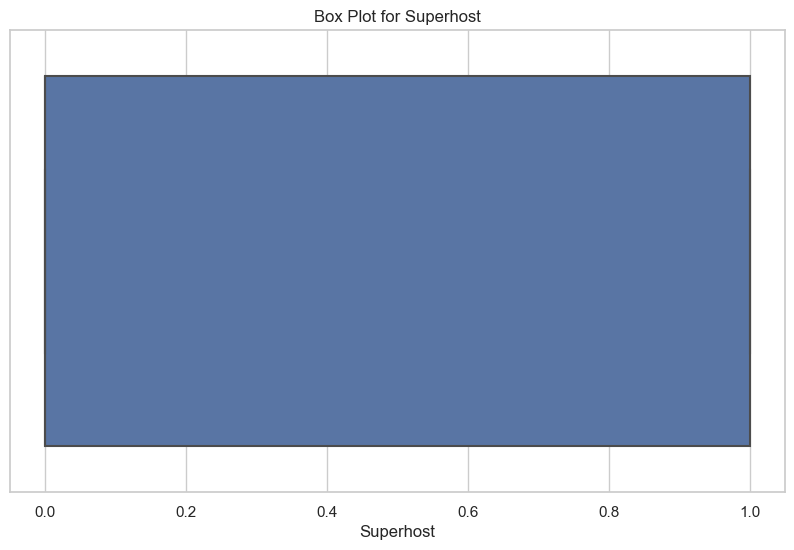

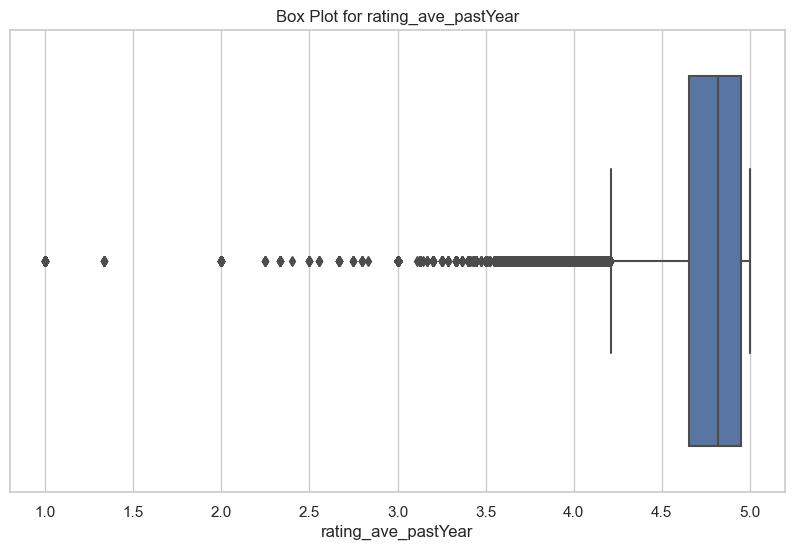

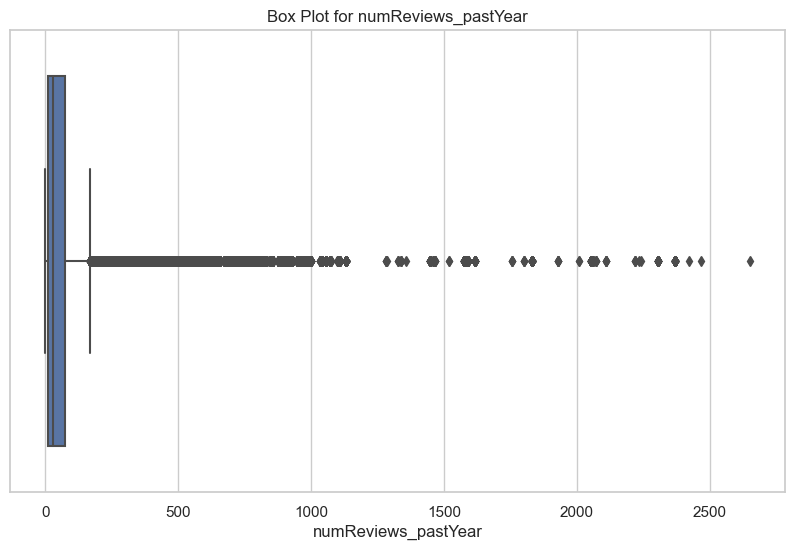

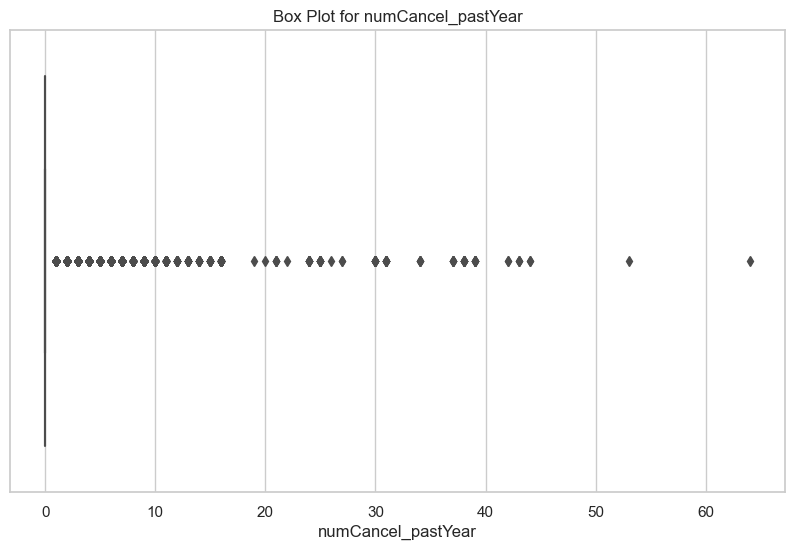

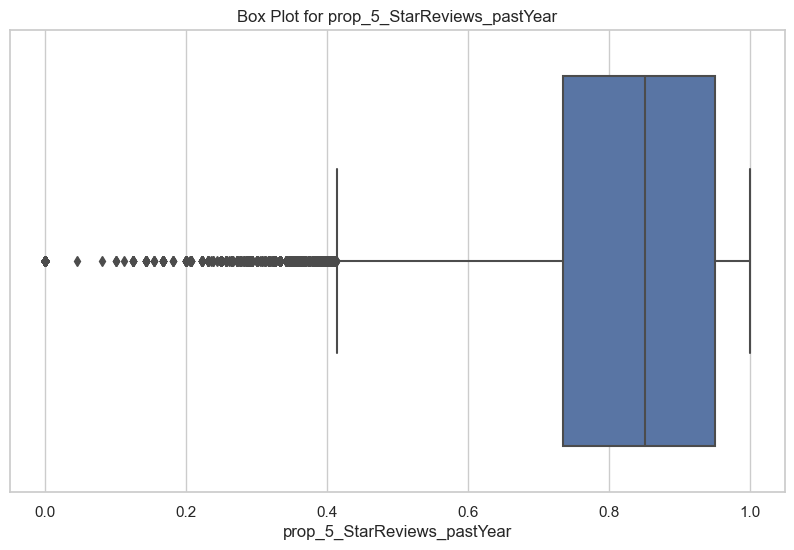

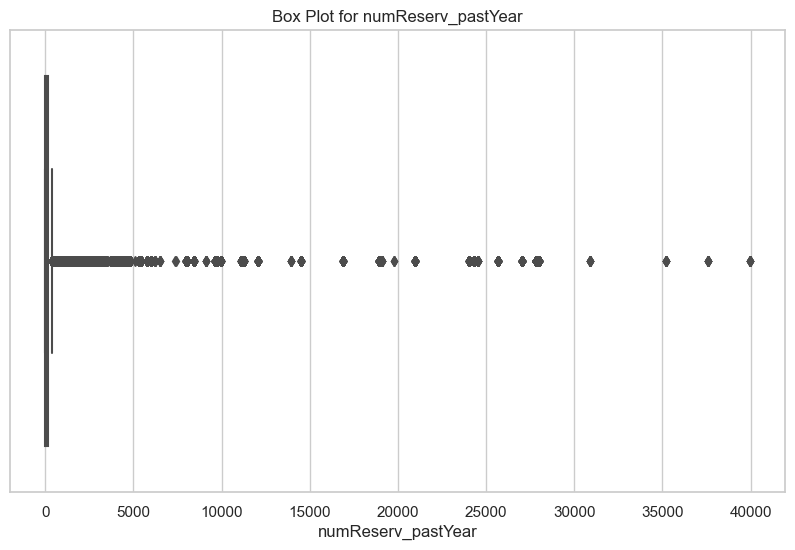

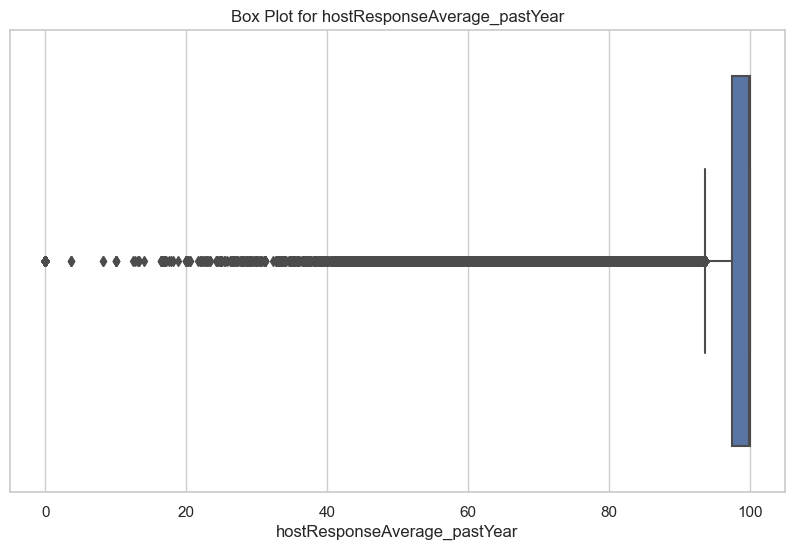

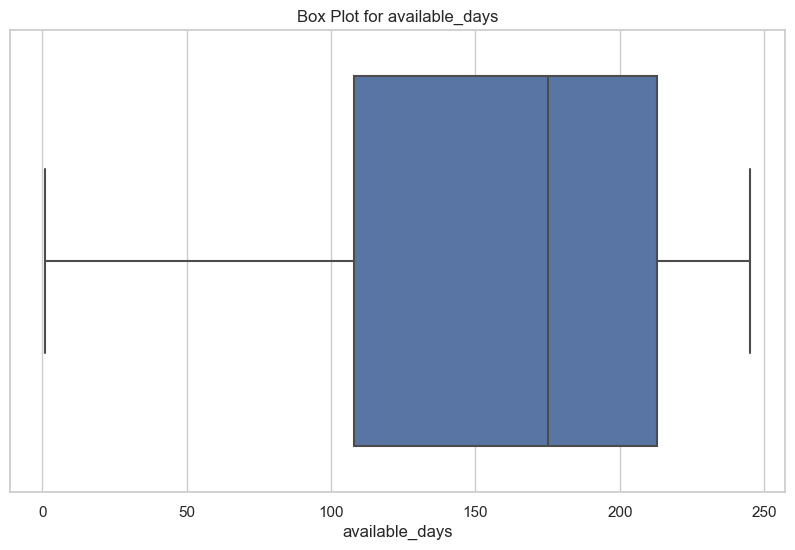

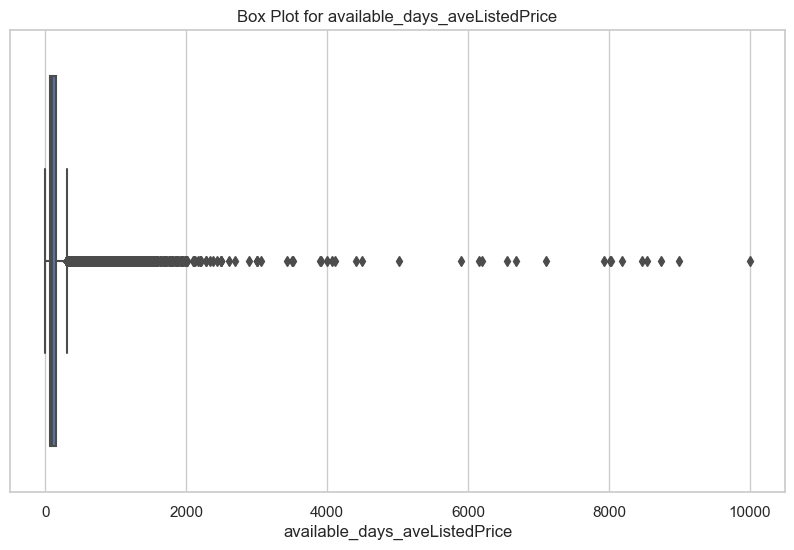

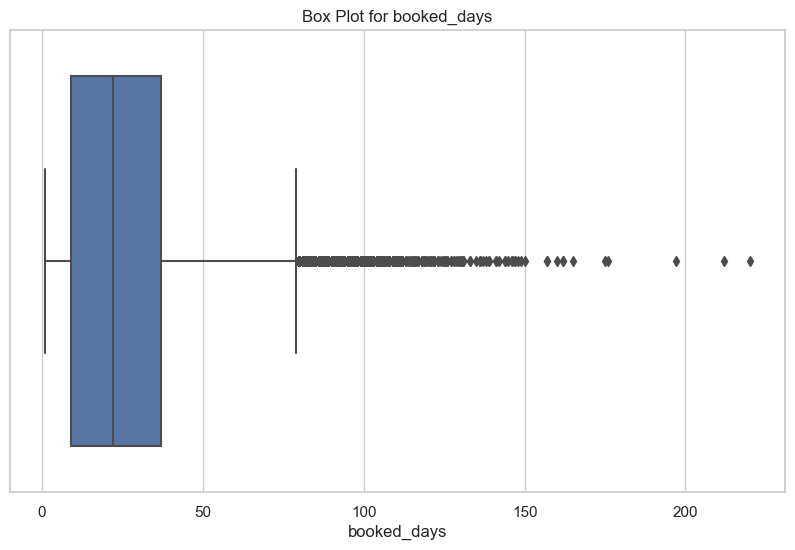

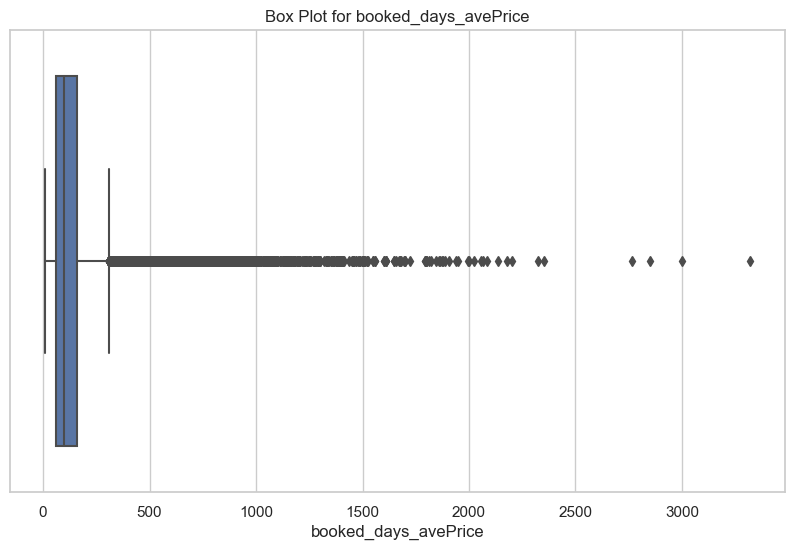

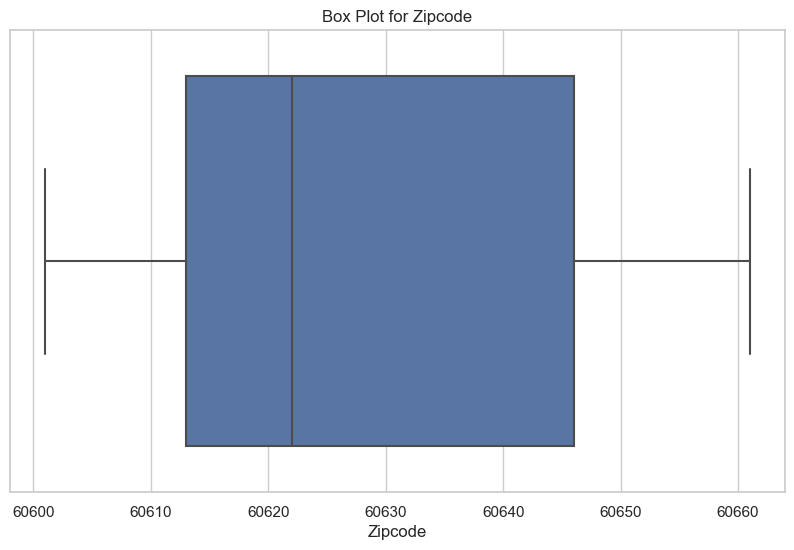

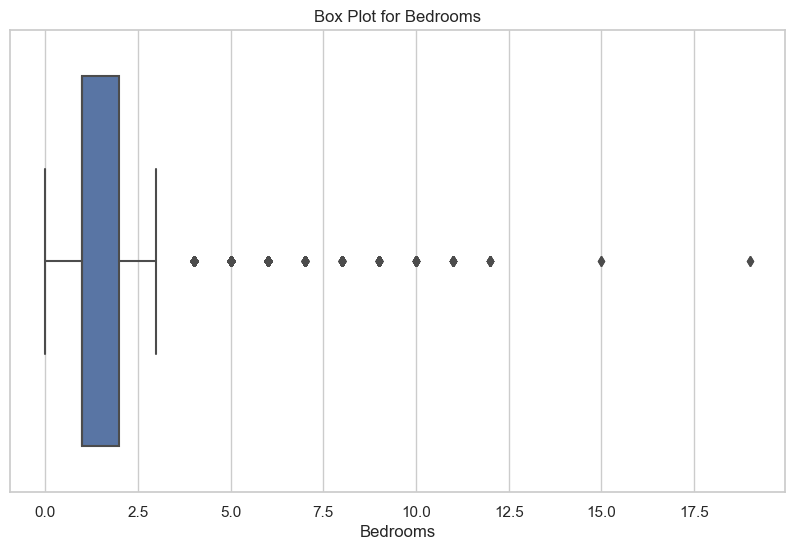

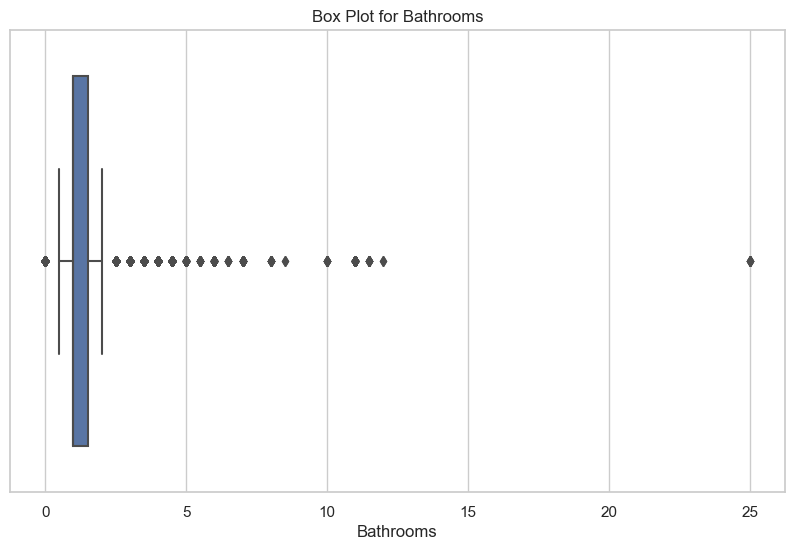

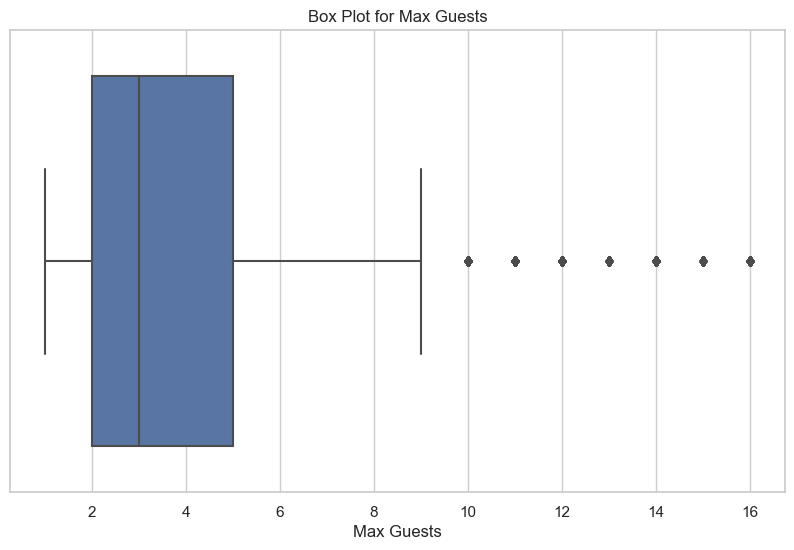

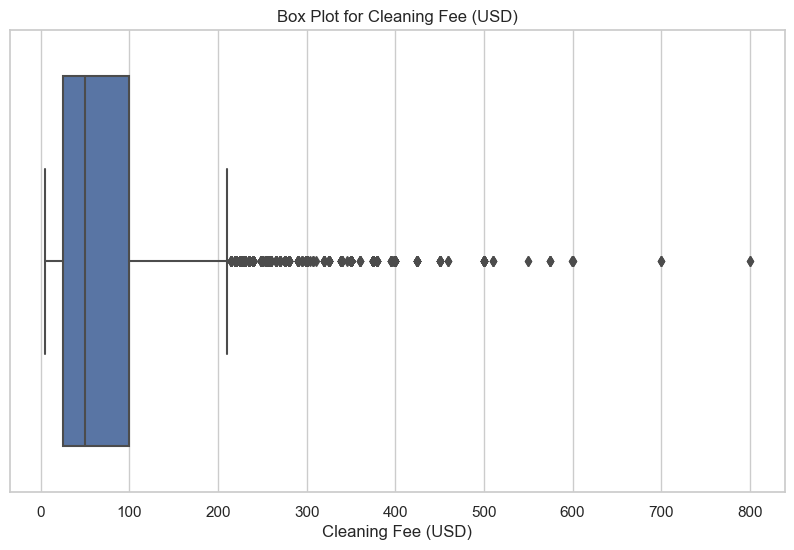

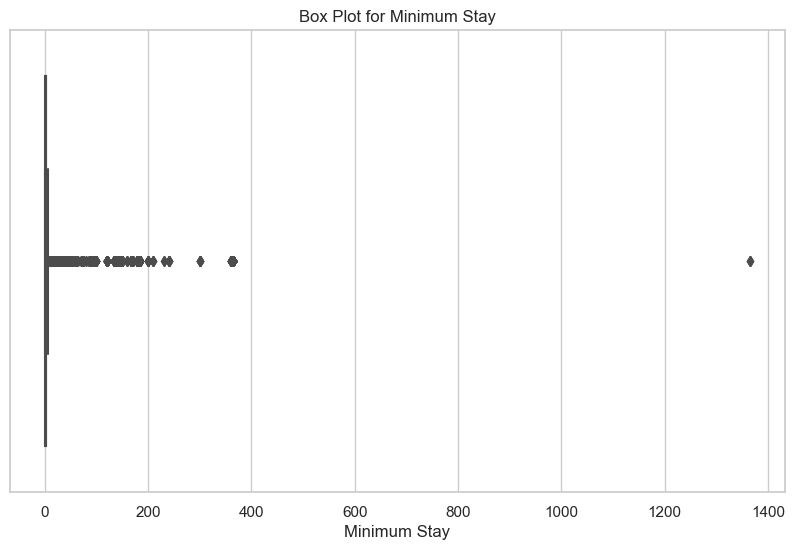

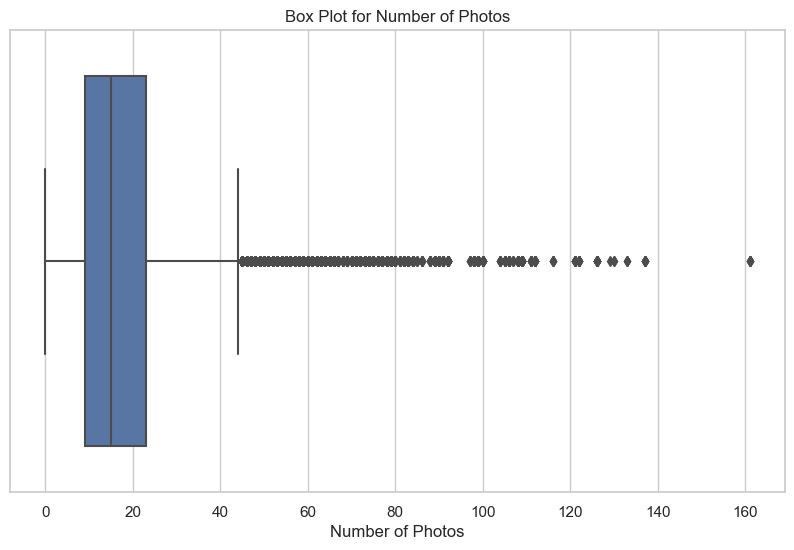

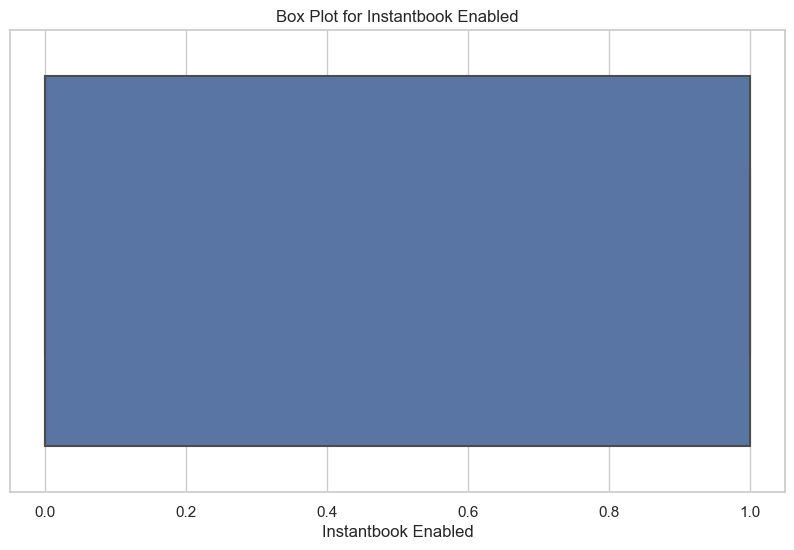

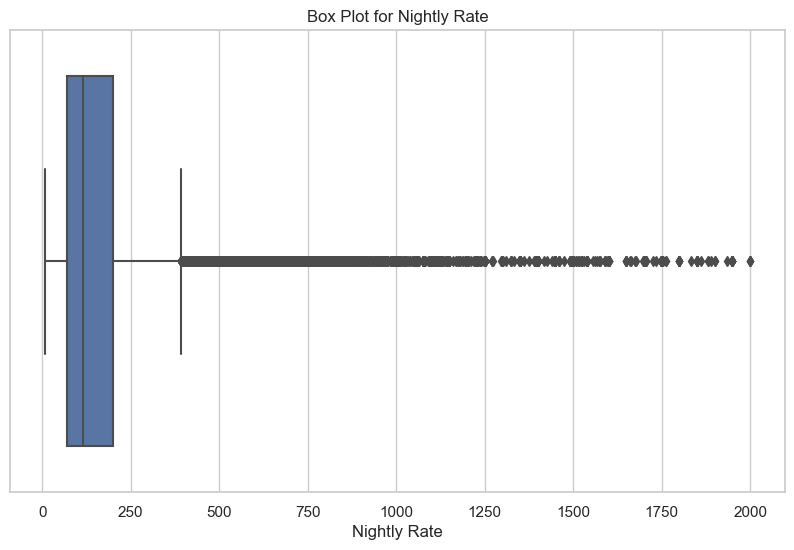

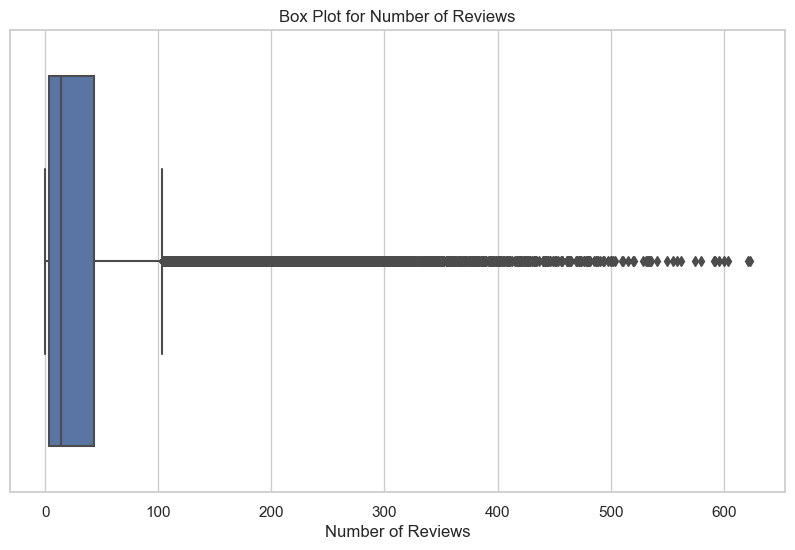

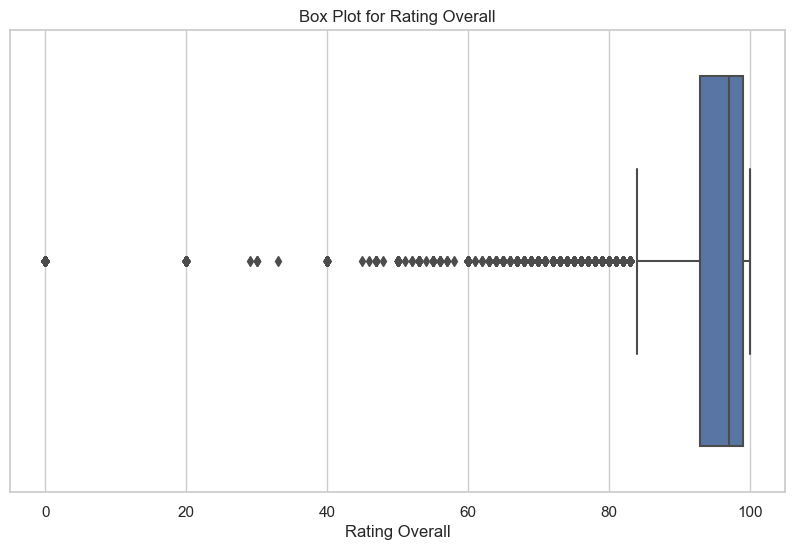

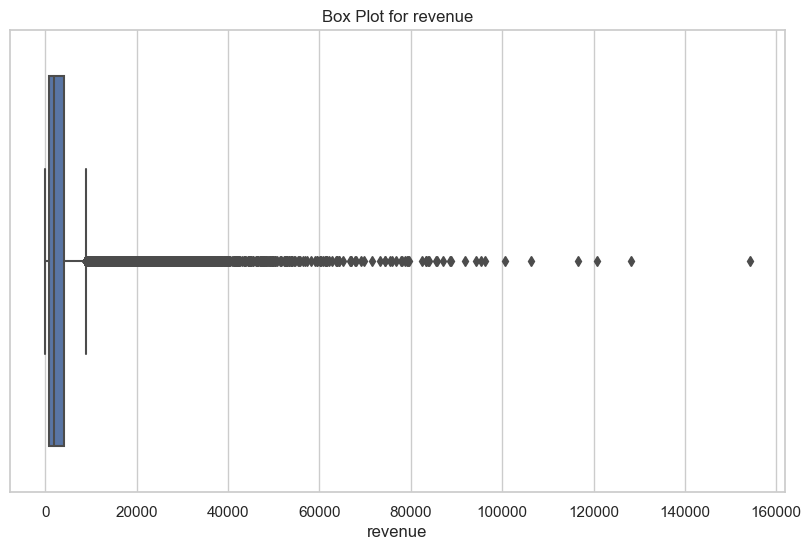

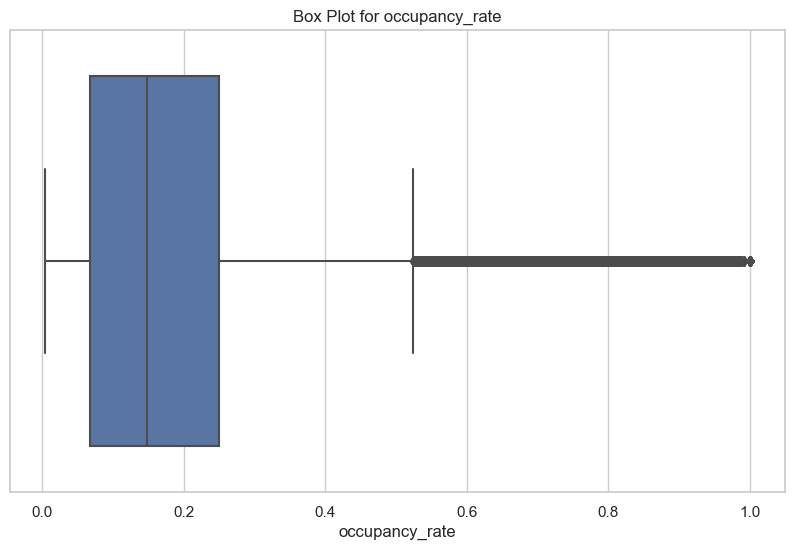

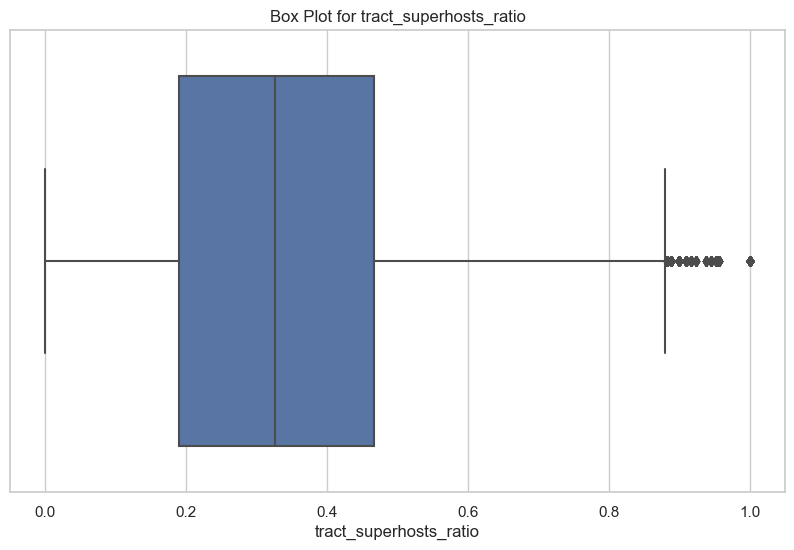

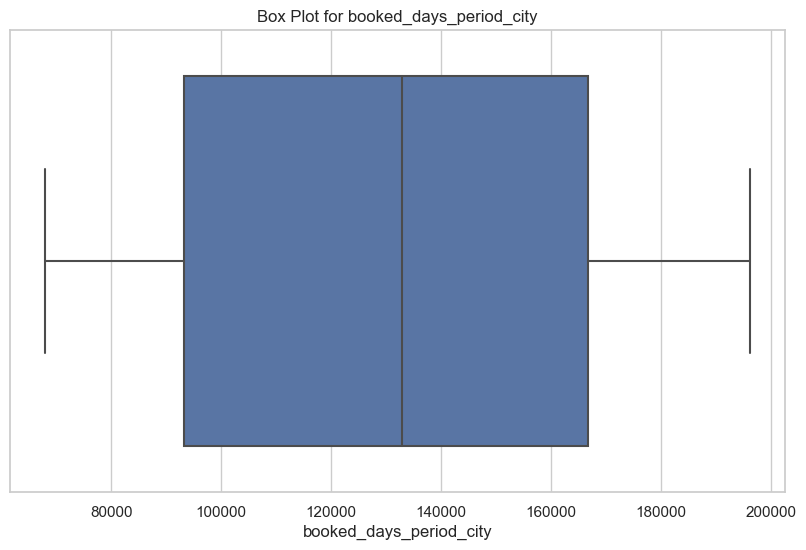

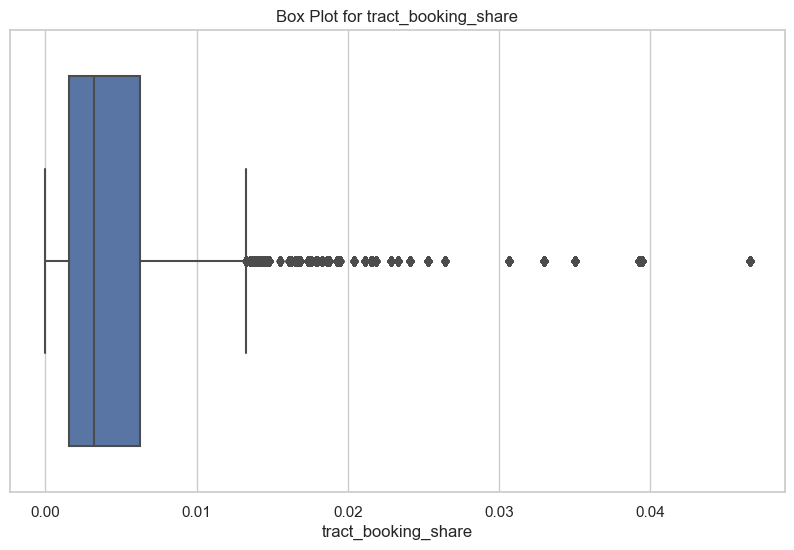

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting the style for the plots
sns.set(style="whitegrid")

# Creating box plots for each numerical column
for col in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot for {col}')
    plt.show()


# Null check and Imputation

In [7]:
print(data.isnull().sum())

Airbnb Host ID                       0
Airbnb Property ID                   0
City_x                               0
superhost_period_all                 0
Superhost                            0
rating_ave_pastYear              19845
numReviews_pastYear              18798
numCancel_pastYear               18798
prop_5_StarReviews_pastYear      19845
numReserv_pastYear                3514
hostResponseAverage_pastYear      7366
available_days                   15027
available_days_aveListedPrice    15027
booked_days                      38108
booked_days_avePrice             38108
Property Type                        1
Listing Type                         0
Zipcode                              0
Bedrooms                            11
Bathrooms                           47
Neighborhood                      1146
Max Guests                           8
Cleaning Fee (USD)               24158
Minimum Stay                         3
Number of Photos                     6
Pets Allowed             

In [8]:
# List of columns for which to drop rows with null values
columns_to_check = [
    'Property Type', 
    'Bedrooms', 
    'Bathrooms',
    'Max Guests', 
    'Minimum Stay', 
    'Number of Photos', 
    'Number of Reviews',
    'occupancy_rate',
    'Neighborhood'
]

# Dropping rows where any of the specified columns have null values
data.dropna(subset=columns_to_check, inplace=True)

In [9]:
print(data.isnull().sum())

Airbnb Host ID                       0
Airbnb Property ID                   0
City_x                               0
superhost_period_all                 0
Superhost                            0
rating_ave_pastYear               9287
numReviews_pastYear               9003
numCancel_pastYear                9003
prop_5_StarReviews_pastYear       9287
numReserv_pastYear                 310
hostResponseAverage_pastYear      2145
available_days                       0
available_days_aveListedPrice        0
booked_days                          0
booked_days_avePrice                 0
Property Type                        0
Listing Type                         0
Zipcode                              0
Bedrooms                             0
Bathrooms                            0
Neighborhood                         0
Max Guests                           0
Cleaning Fee (USD)               12748
Minimum Stay                         0
Number of Photos                     0
Pets Allowed             

In [10]:
# List of columns for which to drop rows with null values
common_missing_records = [
    'Rating Overall', 
    'rating_ave_pastYear',
    'numReserv_pastYear',
    'prop_5_StarReviews_pastYear']

# Dropping rows where any of the specified columns have null values
data.dropna(subset=common_missing_records, inplace=True)

In [11]:
print(data.isnull().sum())

Airbnb Host ID                      0
Airbnb Property ID                  0
City_x                              0
superhost_period_all                0
Superhost                           0
rating_ave_pastYear                 0
numReviews_pastYear                 0
numCancel_pastYear                  0
prop_5_StarReviews_pastYear         0
numReserv_pastYear                  0
hostResponseAverage_pastYear      781
available_days                      0
available_days_aveListedPrice       0
booked_days                         0
booked_days_avePrice                0
Property Type                       0
Listing Type                        0
Zipcode                             0
Bedrooms                            0
Bathrooms                           0
Neighborhood                        0
Max Guests                          0
Cleaning Fee (USD)               9419
Minimum Stay                        0
Number of Photos                    0
Pets Allowed                        0
Instantbook 

# EDA

In [12]:
# Exporting the data dataframe in csv to perform further EDA
file_name = "EDA.csv"
data.to_csv(file_name, index=False)

# Null Imputation Using Iterative Gradient Boosting

In [13]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import GradientBoostingRegressor

# List of columns to impute
columns_to_impute = ['hostResponseAverage_pastYear', 'Cleaning Fee (USD)']

# Initialize IterativeImputer with GradientBoostingRegressor
imputer = IterativeImputer(estimator=GradientBoostingRegressor(), max_iter=10, random_state=0)

# Fit and transform the data
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

# Check the imputed data
print(data)

        Airbnb Host ID  Airbnb Property ID   City_x  superhost_period_all  \
5                 2613                2384  Chicago                     5   
6                 2613                2384  Chicago                     6   
7                 2613                2384  Chicago                     7   
8                 2613                2384  Chicago                     8   
9                 2613                2384  Chicago                     9   
...                ...                 ...      ...                   ...   
120193       289257440            42713512  Chicago                    20   
120195       169297663            42713595  Chicago                    20   
120196       289257440            42714387  Chicago                    20   
120197       289257440            42714699  Chicago                    20   
120214        72165035            42795682  Chicago                    20   

        Superhost  rating_ave_pastYear  numReviews_pastYear  \
5           

/Users/harsh/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [14]:
print(data.isnull().sum())

Airbnb Host ID                   0
Airbnb Property ID               0
City_x                           0
superhost_period_all             0
Superhost                        0
rating_ave_pastYear              0
numReviews_pastYear              0
numCancel_pastYear               0
prop_5_StarReviews_pastYear      0
numReserv_pastYear               0
hostResponseAverage_pastYear     0
available_days                   0
available_days_aveListedPrice    0
booked_days                      0
booked_days_avePrice             0
Property Type                    0
Listing Type                     0
Zipcode                          0
Bedrooms                         0
Bathrooms                        0
Neighborhood                     0
Max Guests                       0
Cleaning Fee (USD)               0
Minimum Stay                     0
Number of Photos                 0
Pets Allowed                     0
Instantbook Enabled              0
Nightly Rate                     0
Number of Reviews   

# Scaling

In [16]:
# from sklearn.preprocessing import StandardScaler

# List of columns to apply Z-transformation
# columns_to_scale = [
#    'rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear', 
#    'hostResponseAverage_pastYear', 'available_days', 'numReserv_pastYear'
#    'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice',
#    'Max Guests', 'Cleaning Fee (USD)', 'Minimum Stay', 'Number of Photos',
#    'Nightly Rate', 'occupancy_rate', 'tract_superhosts_ratio'
#]

# Creating StandardScaler object
#scaler = StandardScaler()

# Applying Z-transformation to the specified columns
#data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# This code will scale the specified columns in the DataFrame 'data' using Z-transformation.


In [17]:
#data.head()

,Airbnb Host ID,Airbnb Property ID,City_x,superhost_period_all,Superhost,rating_ave_pastYear,numReviews_pastYear,numCancel_pastYear,numReservedDays_pastYear,hostResponseAverage_pastYear,...,Pets Allowed,Instantbook Enabled,Nightly Rate,Number of Reviews,Rating Overall,revenue,occupancy_rate,tract_superhosts_ratio,booked_days_period_city,tract_booking_share
5,2613,2384,Chicago,5,1,0.939618,-0.339406,-0.299262,284.0,0.400336,...,False,0,-0.737183,53.0,100.0,1523.0,-0.211599,-0.280955,104924,0.001048
6,2613,2384,Chicago,6,1,0.939618,-0.320786,-0.299262,279.0,0.400336,...,False,0,-0.708786,59.0,100.0,905.0,-0.544436,-0.861007,68005,0.000353
7,2613,2384,Chicago,7,1,0.939618,-0.358026,-0.299262,250.0,0.400336,...,False,0,-0.719435,67.0,100.0,4955.0,1.320367,-0.935373,134202,0.001185
8,2613,2384,Chicago,8,1,0.939618,-0.339406,-0.299262,242.0,0.400336,...,False,0,-0.667966,78.0,100.0,1570.0,-0.182617,3.154736,132913,0.000196
9,2613,2384,Chicago,9,1,0.841752,-0.302166,-0.299262,207.0,0.400336,...,False,0,-0.737183,92.0,100.0,2405.0,0.049476,1.518693,118284,0.000778


# Correlation

In [15]:
from matplotlib import pyplot as plt

/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_23247/626409060.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


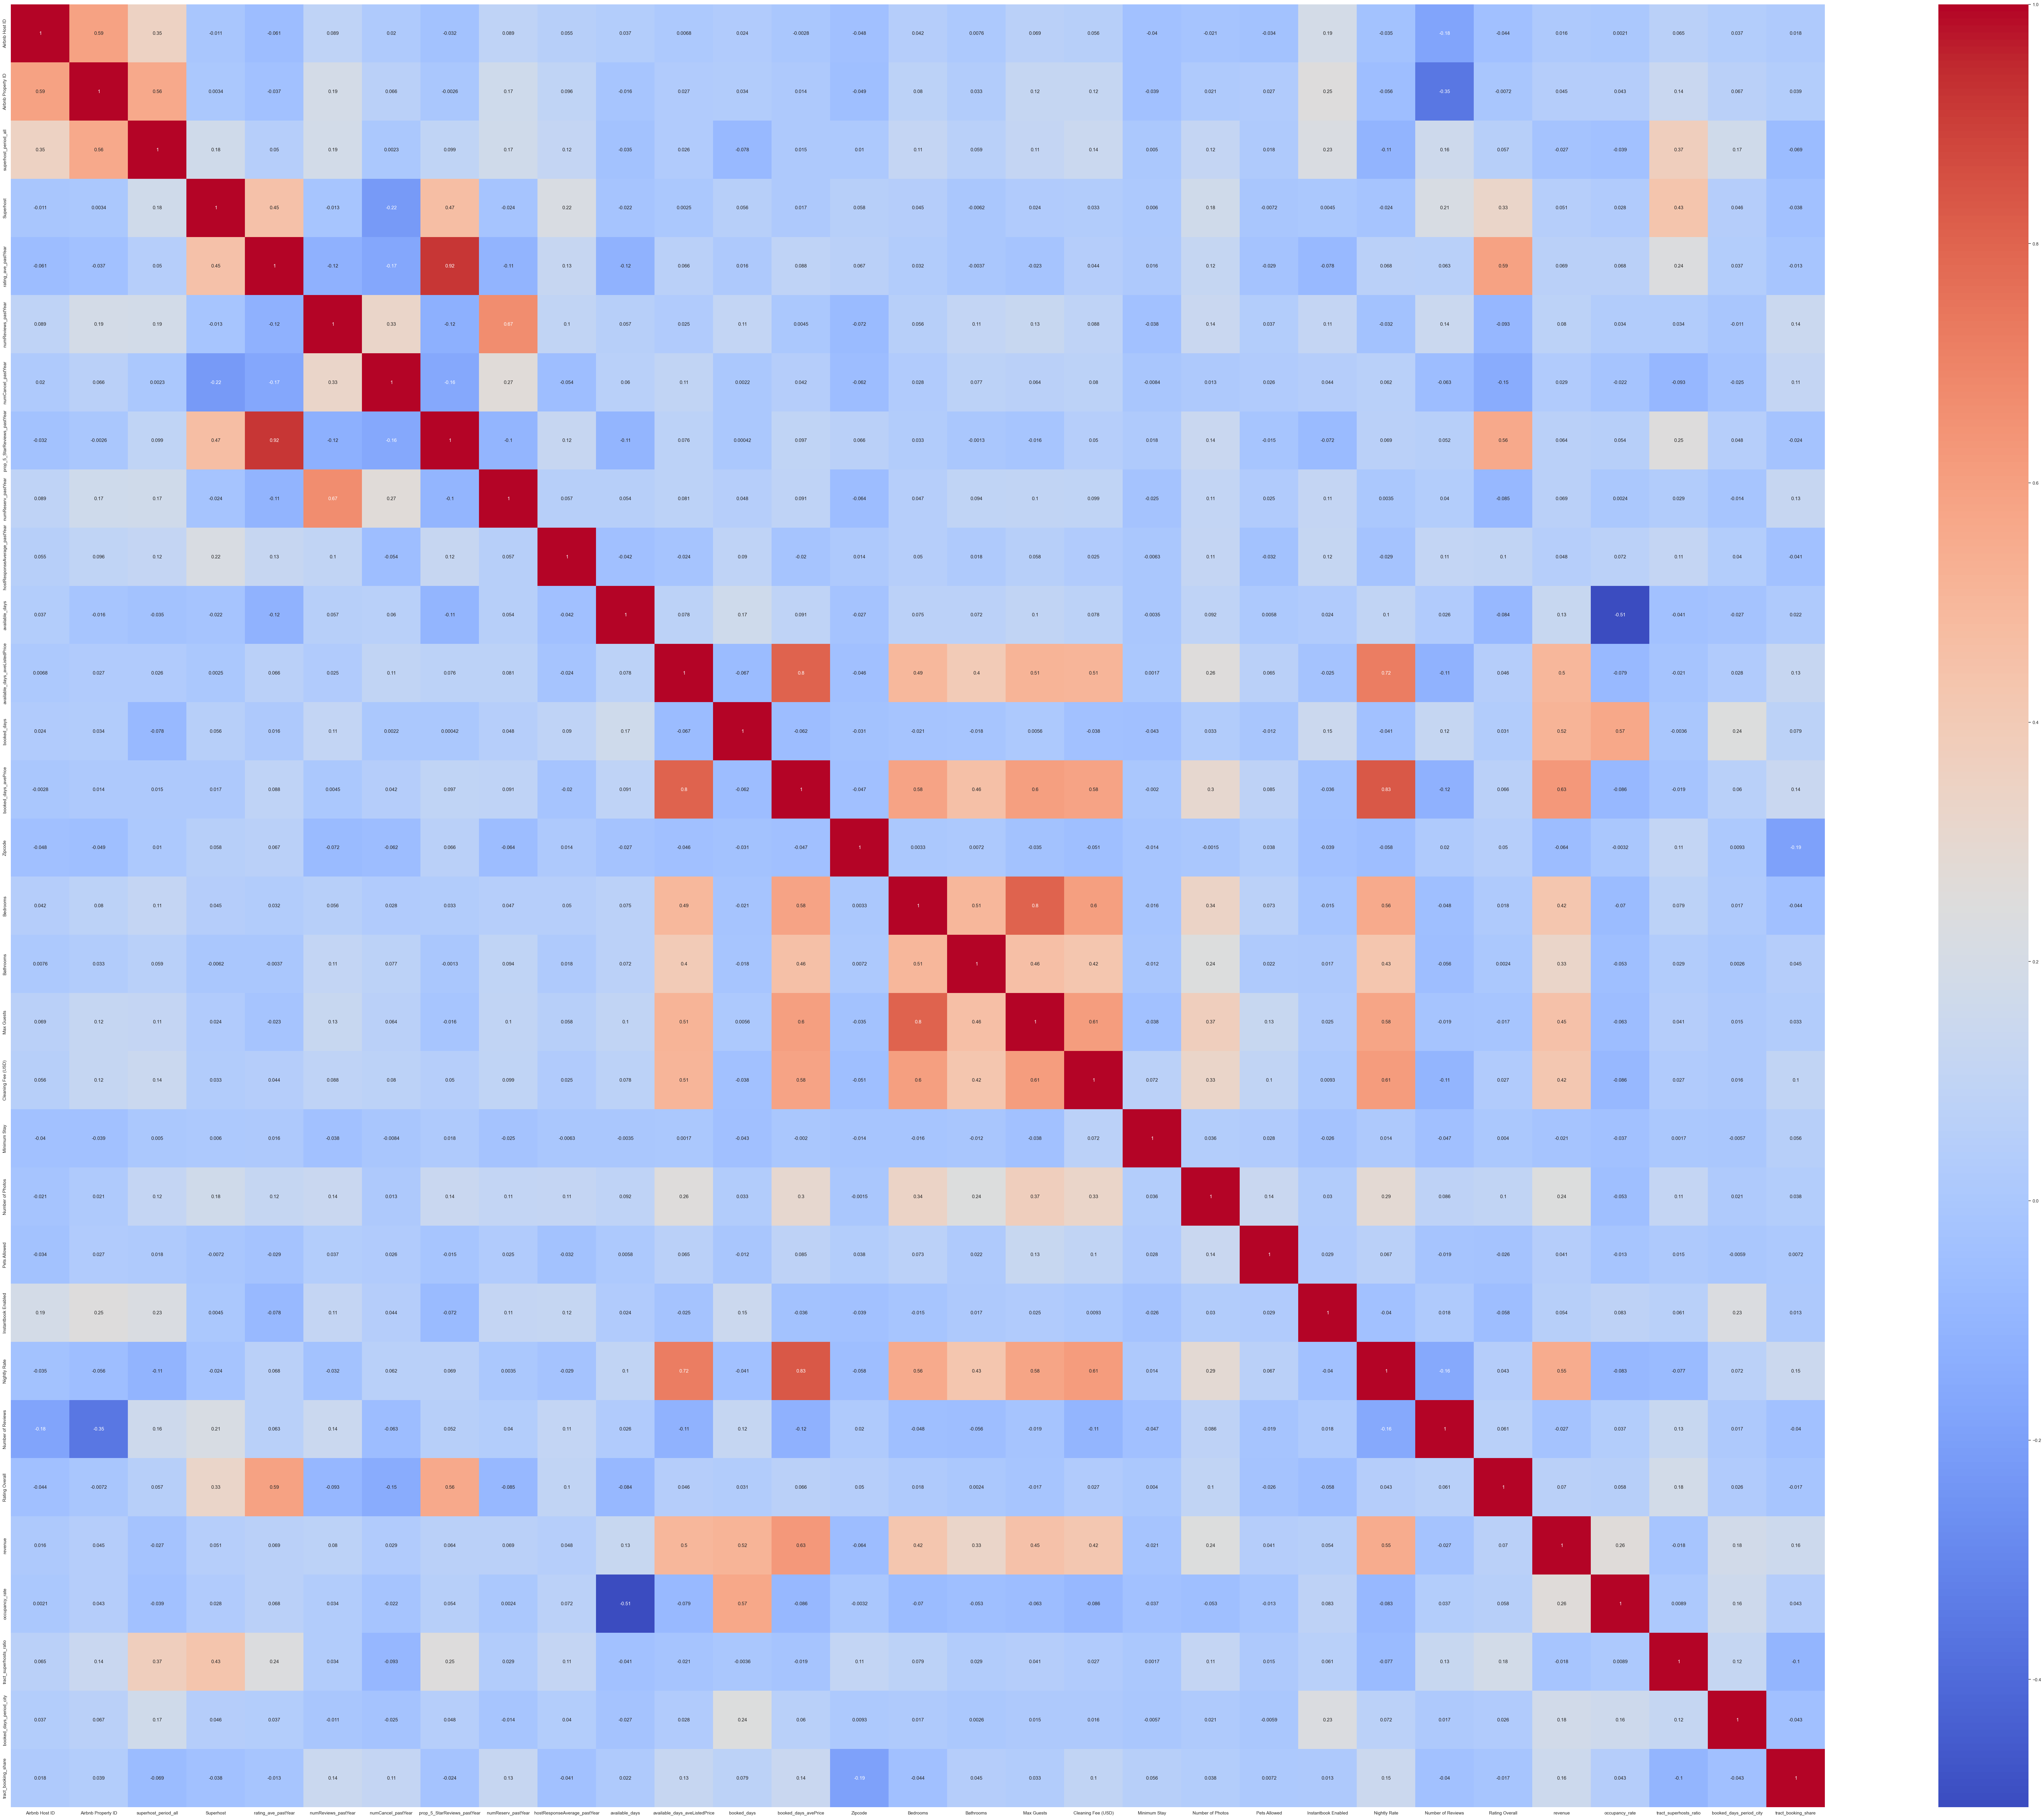

In [16]:
plt.figure(figsize=(100, 80))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Checking multicolinearity from VIF

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

columns_vif = ['rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear',  
    'hostResponseAverage_pastYear', 'available_days', 'numReserv_pastYear',
    'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice',
    'Max Guests', 'Cleaning Fee (USD)', 'Minimum Stay', 'Number of Photos',
    'Nightly Rate', 'occupancy_rate', 'tract_superhosts_ratio', 
    'Bedrooms', 'prop_5_StarReviews_pastYear',
    'Bathrooms','superhost_period_all', 
    'Superhost']

# Assuming 'airbnb_data' is your DataFrame and 'columns_vif' contains the list of scaled columns
vif_data = data[columns_vif]

# Calculating VIF for each feature
vif = pd.DataFrame({
    'Variable': vif_data.columns,
    'VIF': [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
})

# Sorting VIF values in descending order
vif_sorted = vif.sort_values('VIF', ascending=False)

# Displaying the VIF values
print(vif_sorted)


                         Variable         VIF
0             rating_ave_pastYear  474.074412
3    hostResponseAverage_pastYear  243.463384
17    prop_5_StarReviews_pastYear   87.324976
4                  available_days   17.670640
19           superhost_period_all   12.431234
9                      Max Guests   10.522986
16                       Bedrooms   10.367246
8            booked_days_avePrice   10.173246
13                   Nightly Rate    8.917653
14                 occupancy_rate    6.964972
7                     booked_days    6.762309
18                      Bathrooms    5.986203
10             Cleaning Fee (USD)    5.866413
15         tract_superhosts_ratio    5.731292
6   available_days_aveListedPrice    5.330595
12               Number of Photos    3.998245
20                      Superhost    2.815586
1             numReviews_pastYear    2.490808
5              numReserv_pastYear    2.105430
2              numCancel_pastYear    1.324285
11                   Minimum Stay 

Dropping rating_ave_pastYear, to account for a significantly high VIF

In [18]:
data.drop(columns=['rating_ave_pastYear', 
                  ], inplace=True)

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

columns_vif = ['numReviews_pastYear', 'numCancel_pastYear',  
    'hostResponseAverage_pastYear', 'available_days', 'numReserv_pastYear',
    'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice',
    'Max Guests', 'Cleaning Fee (USD)', 'Minimum Stay', 'Number of Photos',
    'Nightly Rate', 'occupancy_rate', 'tract_superhosts_ratio', 
    'Bedrooms', 'prop_5_StarReviews_pastYear',
    'Bathrooms','superhost_period_all', 
    'Superhost']

# Assuming 'airbnb_data' is your DataFrame and 'columns_vif' contains the list of scaled columns
vif_data = data[columns_vif]

# Calculating VIF for each feature
vif = pd.DataFrame({
    'Variable': vif_data.columns,
    'VIF': [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
})

# Sorting VIF values in descending order
vif_sorted = vif.sort_values('VIF', ascending=False)

# Displaying the VIF values
print(vif_sorted)


                         Variable        VIF
2    hostResponseAverage_pastYear  56.634033
16    prop_5_StarReviews_pastYear  35.083353
3                  available_days  16.723341
18           superhost_period_all  12.426382
8                      Max Guests  10.520079
15                       Bedrooms  10.366989
7            booked_days_avePrice  10.171421
12                   Nightly Rate   8.906295
13                 occupancy_rate   6.772882
6                     booked_days   6.660461
17                      Bathrooms   5.970983
9              Cleaning Fee (USD)   5.866296
14         tract_superhosts_ratio   5.719883
5   available_days_aveListedPrice   5.330454
11               Number of Photos   3.990075
19                      Superhost   2.704392
0             numReviews_pastYear   2.488375
4              numReserv_pastYear   2.105238
1              numCancel_pastYear   1.323316
10                   Minimum Stay   1.117237


# Saving the dataframe to the final csv

In [20]:
# Assuming 'data' is your DataFrame
file_name = "airbnb_chicago_post_preprocessing.csv"  # Set the name of your output file
data.to_csv(file_name, index=False)  # Save DataFrame to a CSV file without the index